# What is an Algorithm?

In [1]:
from manim import *
import random
#from manim_voiceover import VoiceoverScene
#from manim_voiceover.services.recorder import RecorderService

Manim Community v0.18.0

In [14]:
# Define an array object so that when it is animated it is a long rectangle with small squares inside
class Array(Rectangle):
    def __init__(self, values, **kwargs):
        self.values = values # List of values in the array
        self.n = len(values) # Number of elements in the array
        
        # Call the constructor of the parent class (Rectangle)
        # Ensure the rectangle is large enough to contain all squares
        super().__init__(width=self.n, height=1, **kwargs)

        # Initialize the squares and texts
        self.squares = VGroup()  # Group for squares
        self.texts = VGroup()    # Group for text
        
        # Calculate the side length of each square based on the number of elements
        square_side = self.width / self.n

        # Create squares and texts for each value
        for i, value in enumerate(self.values):
            square = Square(side_length=square_side)
            # Position each square within the rectangle
            square.move_to(self.get_left() + RIGHT * square_side * (0.5 + i))
            self.squares.add(square)

            text = Text(str(value), font_size=36)
            text.move_to(square.get_center())
            self.texts.add(text)

        # Add the squares and texts as submobjects
        self.add(self.squares, self.texts)
        
    def update_array(self, new_values):
        """ Update the array with new values. """
        self.values = new_values
        for text, value in zip(self.texts, self.values):
            text.set_text(str(value))
    

In [20]:
class ArrayScene(Scene):
    def construct(self):
        # Create the array object
        array_values = [5, 3, 1, 2, 4]
        array = Array(array_values)
        
        # Center the array in the scene
        array.move_to(ORIGIN)
        
        # Animate the array
        self.play(Write(array))
        
        self.wait()
    
%manim -ql -v WARNING ArrayScene

In [4]:
class LatexArray(Rectangle):
    def __init__(self, n, **kwargs):
        self.n = n  # Number of elements in the array

        # Call the constructor of the parent class (Rectangle)
        super().__init__(width=self.n, height=1, **kwargs)

        # Initialize the squares and texts
        self.squares = VGroup()  # Group for squares
        self.texts = VGroup()    # Group for text

        # Calculate the side length of each square based on the number of elements
        square_side = self.width / self.n

        # Create squares and LaTeX texts for each value
        for i in range(self.n):
            square = Square(side_length=square_side)
            # Position each square within the rectangle
            square.move_to(self.get_left() + RIGHT * square_side * (0.5 + i))
            self.squares.add(square)

            #if i == 0:
            #    latex_text = f"a_{{{i+1}}}"
            #elif i == self.n - 1:
            #    latex_text = f"a_{{{i+1}}}"
            #else:
            #    latex_text = "\\dots"
            if i == self.n - 2:
                latex_text = "\\dots"
            elif i == self.n - 1:
                latex_text = f"a_{{n}}"
            else:
                latex_text = f"a_{{{i+1}}}"
                
            
            text = MathTex(latex_text, font_size=36)
            text.move_to(square.get_center())
            self.texts.add(text)

        # Add the squares and texts as submobjects
        self.add(self.squares, self.texts)

    def update_array(self, new_values):
        """ Update the array with new values. """
        # Implement the logic to update LaTeX text if needed
        pass


In [5]:
class LatexArrayScene(Scene):
    def construct(self):
        # Create the array object
        array = LatexArray(5)

        # Center the array in the scene
        array.move_to(ORIGIN)

        # Animate the array
        self.play(Write(array))

        self.wait()

%manim -ql -v WARNING LatexArrayScene

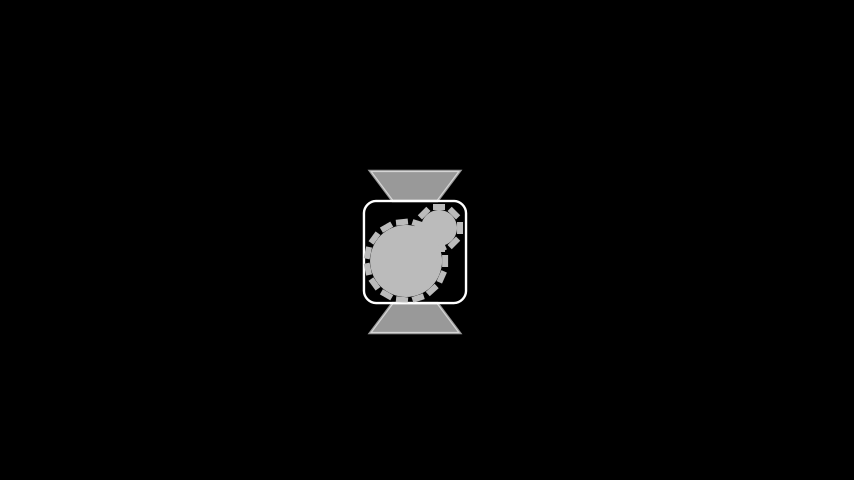

In [2]:
from manim import *

class Gear(VGroup):
    def __init__(self, num_teeth=8, radius=1, tooth_size=0.1, **kwargs):
        super().__init__(**kwargs)
        self.radius = radius  # Store radius as an instance attribute
        self.extended_radius = radius + tooth_size  # Include the tooth size in the extended radius
        
        # Main circle
        circle = Circle(radius=self.radius)
        self.add(circle)

        # Teeth around the circle
        for i in range(num_teeth):
            angle = i * TAU / num_teeth
            # Adding a small rectangle as a tooth
            tooth = Rectangle(height=tooth_size, width=tooth_size*2)
            tooth.set_fill(WHITE, opacity=1)
            tooth.set_stroke(width=0)
            tooth.next_to(circle, UP, buff=0)
            tooth.rotate(angle, about_point=circle.get_center())
            self.add(tooth)

        # Central circle to cover overlapping parts
        central_circle = Circle(radius=tooth_size*1.5)
        central_circle.set_fill(BLACK, opacity=1)
        self.add(central_circle)
        
        self.set_stroke(width=0)
        self.set_fill(GREY_B, opacity=1)


class GearBox(VGroup):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # Create two gears
        self.gear1 = Gear(num_teeth=15, radius=0.6, tooth_size=0.1)  # Larger gear
        self.gear2 = Gear(num_teeth=8, radius=0.3, tooth_size=0.1)   # Smaller gear

        # Calculate the total width and height needed for the box
        buffer_space = 0.4  # Increased buffer space
        total_width = self.gear1.extended_radius + self.gear2.extended_radius + buffer_space
        total_height = total_width  # Making the box square

        # Create the box, adjusting its size based on gears
        box = RoundedRectangle(corner_radius=0.2, height=total_height+0.2, width=total_width+0.2)
        self.add(box)

        # Position gears in the desired corners
        self.gear1.move_to(box.get_center() + LEFT * self.gear1.extended_radius / 2 + DOWN * self.gear1.extended_radius / 2)
        self.gear2.move_to(box.get_center() + RIGHT * self.gear2.extended_radius / 2 + UP * self.gear2.extended_radius / 2)

        self.add(self.gear1, self.gear2)
        
        # Create an upside-down trapezoid for input
        trapezoid_height = 0.5
        trapezoid_bottom_width = total_width / 2
        trapezoid_top_width = total_width
        trapezoid = Polygon(
            box.get_top(),
            box.get_top() + LEFT * trapezoid_top_width / 2,
            box.get_top() + LEFT * trapezoid_bottom_width / 2 + UP * trapezoid_height,
            box.get_top() + RIGHT * trapezoid_bottom_width / 2 + UP * trapezoid_height,
            box.get_top() + RIGHT * trapezoid_top_width / 2,
            color=WHITE,
            fill_opacity=1
        )
        
        self.trapezoid = trapezoid
        
        # Rotate and shift the trapezoid
        rotation_angle = 180 * DEGREES  # Rotation angle (can be adjusted)
        trapezoid.rotate(rotation_angle, about_point=trapezoid.get_center())
        
        shift_vector = DOWN * 0.2 + LEFT * 0.2 # Shift direction and magnitude (can be adjusted)
        trapezoid.shift(shift_vector)
        
        trapezoid.set_opacity(0.6)  # Set to any value from 0 to 1
        self.add(trapezoid)
        
        # Create another trapezoid for output
        trapezoid2_height = 0.5
        trapezoid2_bottom_width = total_width / 2
        trapezoid2_top_width = total_width
        trapezoid2 = Polygon(
            box.get_bottom(),
            box.get_bottom() + LEFT * trapezoid2_top_width / 2,
            box.get_bottom() + LEFT * trapezoid2_bottom_width / 2 + DOWN * trapezoid2_height,
            box.get_bottom() + RIGHT * trapezoid2_bottom_width / 2 + DOWN * trapezoid2_height,
            box.get_bottom() + RIGHT * trapezoid2_top_width / 2,
            color=WHITE,
            fill_opacity=1
        )
        
        trapezoid2.set_opacity(0.6)  # Set to any value from 0 to 1
        self.trapezoid2 = trapezoid2
        
        # Rotate and shift the trapezoid
        rotation_angle = 180 * DEGREES  # Rotation angle (can be adjusted)
        trapezoid2.rotate(rotation_angle, about_point=trapezoid2.get_center())
        
        shift_vector = DOWN * 0.2 + LEFT * 0.2
        # Shift direction and magnitude (can be adjusted)
        trapezoid2.shift(shift_vector)
        
        self.add(trapezoid2)

        # Define the updater function for gear rotation
        self.gear1.add_updater(lambda m, dt: m.rotate(TAU/8 * dt))
        self.gear2.add_updater(lambda m, dt: m.rotate(-TAU/8 * dt * self.gear1.radius / self.gear2.radius))

        box.shift(LEFT * 0.2)  # shift the box to the left and down a bit
        box.shift(DOWN * 0.2)  # shift the box to the left and down a bit

        
class GearBoxScene(Scene):
    def construct(self):
        gearbox = GearBox()        
        self.play(FadeIn(gearbox))
        self.wait(5)
        gearbox.gear1.clear_updaters()
        gearbox.gear2.clear_updaters()
        self.wait(1)

# To run this scene, use the following command in your terminal:
%manim -ql -s -v WARNING GearBoxScene

# Scene Structure

## Scene 1: Introduction
Voiceover: "What is an algorithm?"
Tex: "Algorithm"



In [8]:
class OpeningScene(Scene):
    def construct(self):
        # First, what is an Algorithm?
        tx1 = Text("Algorithm").scale(1.0)
        self.play(Write(tx1))
        self.wait(1)
        
        # Move the text up to the top of the scene
        self.play(tx1.animate.shift(UP*3))
        self.wait(1)
        
        # Introduce the concept of Inputs
        input_text = Text("Inputs", color=BLUE).next_to(tx1, DOWN * 0.5, buff=1)
        self.play(Write(input_text))

        # Create input circles
        inputs = VGroup(*[Circle(color=BLUE).scale(0.2) for _ in range(3)])
        inputs.arrange(RIGHT, buff=0.5)
        inputs.next_to(input_text, DOWN)

        # Create square brackets and variable label
        left_bracket = Text("[", color=WHITE).scale(1.5)
        right_bracket = Text("]", color=WHITE).scale(1.5)
        variable_label = Text("x =", color=WHITE).scale(0.7)

        # Position the brackets and label
        left_bracket.next_to(inputs, LEFT, buff=0.1)
        right_bracket.next_to(inputs, RIGHT, buff=0.1)
        variable_label.next_to(left_bracket, LEFT, buff=0.2).align_to(left_bracket, DOWN)

        # Group the circles with the brackets
        input_group = VGroup(left_bracket, inputs, right_bracket)
        input_group.next_to(input_text, DOWN)

        # Animate the creation of the inputs and brackets
        self.play(LaggedStart(*[DrawBorderThenFill(obj) for obj in inputs], lag_ratio=0.5))
        self.play(Write(left_bracket), Write(right_bracket), Write(variable_label))
        
        # Introduce the GearBox (Algorithm at Work)
        gearbox = GearBox()
        # Move the gear box to just below the inputs
        gearbox.move_to(input_text.get_center() + DOWN*3.0)
        self.play(FadeIn(gearbox))
        
        # Add 'f(x) =' Text next to the GearBox
        function_label = Text("f(x) =", color=WHITE).scale(0.7)
        function_label.next_to(gearbox, LEFT, buff=0.4)
        self.play(Write(function_label))
        
        # Animate the inputs and brackets being sucked into the gearbox
        target_point = gearbox.trapezoid.get_center()
        
        # Animate the input_group being squeezed into the gearbox
        self.play(
            input_group.animate.scale(0.1).move_to(target_point),
            run_time=1.5,
            rate_func=linear
        )
        
        # Fade out the variable label and input_group at the same time
        self.play(
            FadeOut(variable_label),
            FadeOut(input_group),
            run_time=0.1
        )
        
        # Fade out the input_text and move the gear box and the function label up
        self.play(
            FadeOut(input_text),
            gearbox.animate.shift(UP*1.5),
            function_label.animate.shift(UP*1.5),
            run_time=0.5
        )
        
        # Create a new instance of the input_group, representing the transformed array
        transformed_inputs = VGroup(*[Circle(color=BLUE).scale(0.2) for _ in range(3)])
        transformed_inputs.arrange(RIGHT, buff=0.5)
        
        # Create square brackets
        transformed_left_bracket = Text("[", color=WHITE).scale(1.5)
        transformed_right_bracket = Text("]", color=WHITE).scale(1.5)
        
        # Position the brackets and label
        transformed_left_bracket.next_to(transformed_inputs, LEFT, buff=0.1)
        transformed_right_bracket.next_to(transformed_inputs, RIGHT, buff=0.1)
       
        transformed_group = VGroup(transformed_left_bracket, transformed_inputs, transformed_right_bracket)

        # Position the transformed_group to emerge from the side of the gearbox
        #transformed_group.next_to(gearbox, RIGHT, buff=1.0)
        
        # Initially scale down and position the transformed_group next to the gearbox
        transformed_group.scale(0.1)  # Start very small
        transformed_group.next_to(gearbox, RIGHT, buff=0.2)

        # Animate the transformed_group expanding outwards from the gearbox
        self.play(
            transformed_group.animate.scale(10).next_to(gearbox, RIGHT, buff=0.5),
            run_time=1,
            rate_func=smooth
        )
        
        # Loop through the circles in the transformed input array and randomly change their colors and shapes
        for circle in transformed_inputs:
            # Choose a random color and shape
            random_color = random.choice([RED, GREEN, BLUE, YELLOW])
            random_shape_class = random.choice([Circle, Square, Triangle])
            
            # Create a new shape of the chosen type, with the same size and position as the circle
            new_shape = random_shape_class(color=random_color).scale(0.2)
            new_shape.move_to(circle.get_center())

            # Animate the transformation of the circle into the new shape
            self.play(Transform(circle, new_shape), run_time=1)
        
        # Set target point as the center of the gearbox
        target_point = gearbox.get_center()
        
        # Shrink the transformed_group back into the gearbox
        self.play(
            transformed_group.animate.scale(0.01).move_to(target_point),
            run_time=1.0,
            rate_func=linear
        )
        
        # Fade out the transformed input_group 
        self.play(
            FadeOut(transformed_group),
            run_time=0.1
        )
        
        # Regrow the transformed group from the bottom trapezoid of the gearbox
        # Set the new target point for the bottom trapezoid of the gearbox
        target_point = gearbox.trapezoid2.get_center() + DOWN*0.7

        # Scale up the transformed_group from the new target point
        self.play(
            transformed_group.animate.scale(100).move_to(target_point),
            run_time=1.0,
            rate_func=linear
        )
        
        self.wait(2)
        
        # Fade out the 'f(x)', the top and bottom trapezoids of the gearbox and the output group
        self.play(
            FadeOut(function_label),
            FadeOut(gearbox.trapezoid),
            FadeOut(gearbox.trapezoid2),
            FadeOut(transformed_group),
            run_time=0.3
        )
        
        # Remove the trapezoids from the gearbox
        gearbox.remove(gearbox.trapezoid)
        gearbox.remove(gearbox.trapezoid2)
        
        # Move the gearbox down to its original position
        self.play(
            gearbox.animate.shift(DOWN*0.5),
            run_time=0.5
        )
                
        self.wait(1)
        
        # Lets take a look at what is happening inside of this gearbox
        tx2 = Text("What's happening inside?").scale(0.8)
        tx2.shift(UP*2.0)
        
        self.play(Write(tx2))
        
        self.wait()
        
        self.play(
            FadeOut(gearbox.gear1),
            FadeOut(gearbox.gear2),
        )
        
        # remove the gears from the gearbox
        gearbox.remove(gearbox.gear1)
        gearbox.remove(gearbox.gear2)
        
        # Fade out the text and expand the rounded square out of the bounds of the camera
        self.play(
            FadeOut(tx2, tx1),
        )
        
        self.play(
            gearbox.animate.scale(50.0),
            run_time=1.0
        )

#%manim -qh -v WARNING OpeningScene
%manim -ql -v WARNING -r 426,240 OpeningScene

# Scene 2: Algorithms are mathematical

Voiceover: "The main idea I hope to convey here is that algorithms are mathematical. They are not just a bunch of steps to follow. They are a mathematical process that can be proven to work."

Tex: "Algorithm => Mathematical Process"
Tex: Converts to "f(x)"

In [6]:
class WhatAreAlgorithms(Scene):
    def construct(self):
        # First, what is an Algorithm?
        tx1 = Text("What is an Algorithm?").scale(1.0)
        
        tx1.move_to(UP*2.5)
        
        self.play(Write(tx1))
        
        # Gearbox for visual effect
        gearbox = GearBox()
        # Remove the trapazoids from the gearbox
        #gearbox.remove(gearbox.trapezoid)
        #gearbox.remove(gearbox.trapezoid2)
        gearbox.move_to(ORIGIN)
        self.play(FadeIn(gearbox))

        # Is it just code?
        # Left Side: "Just Code" with an Enhanced Animation
        code_box = RoundedRectangle(height=3, width=4, corner_radius=0.2, color="#8B2323").to_edge(LEFT)
        code_label = Text("Just Code?", font_size=24).next_to(code_box, UP)
        
        code_lines = VGroup(
            MarkupText("<span font_family='Monospace' fgcolor='white'>1: </span><span font_family='Monospace' fgcolor='lightblue'>def</span> <span font_family='Monospace' fgcolor='yellow'>algorithm</span><span font_family='Monospace' fgcolor='white'>():</span>", font_size=20),
            MarkupText("<span font_family='Monospace' fgcolor='white'>2:    </span><span font_family='Monospace' fgcolor='orange'>perform_task</span><span font_family='Monospace' fgcolor='white'>()</span>", font_size=20),
            MarkupText("<span font_family='Monospace' fgcolor='white'>3:    </span><span font_family='Monospace' fgcolor='orange'>check_condition</span><span font_family='Monospace' fgcolor='white'>()</span>", font_size=20),
            MarkupText("<span font_family='Monospace' fgcolor='white'>4:    return </span><span font_family='Monospace' fgcolor='green'>result</span>", font_size=20)
        )

        # Position the code lines within the code box
        code_lines.arrange(DOWN, aligned_edge=LEFT, center=False)
        code_lines.next_to(code_box.get_top(), DOWN, buff=0.5)

        # Right Side: "Logical Sequences" inside a Rounded Box
        logical_box = RoundedRectangle(height=3, width=4, corner_radius=0.2, color="#8B2323").to_edge(RIGHT)
        logical_label = Text("Logical Sequences?", font_size=24).next_to(logical_box, UP)

        # Create nodes with numbers
        numbers = [1, 2, 3, 4]  # Example numbers
        nodes = [Circle(radius=0.3, color=WHITE).add(Text(str(num), font_size=20)) for num in numbers]

        # Manually position the nodes inside the logical_box
        positions = [0.5*UP + 1*LEFT, 0.5*DOWN + 1*LEFT, 0.5*DOWN + 1*RIGHT, 0.5*UP + 1*RIGHT]
        for node, pos in zip(nodes, positions):
            node.move_to(logical_box.get_center() + pos)

        # Create arrows based on new node positions
        arrows = []
        for i in range(len(nodes)-1):
            start_node = nodes[i]
            end_node = nodes[(i + 1) % len(nodes)]
            vec = end_node.get_center() - start_node.get_center()
            direction = vec / np.linalg.norm(vec)
            arrows.append(Arrow(start=start_node.get_center() + direction * 0.3, end=end_node.get_center() - direction * 0.3, buff=0))

        # Grouping the nodes, arrows, and operation labels together
        logical_group = VGroup(*nodes, *arrows)
        
        # Animate the box and label
        self.play(Create(code_box))
        self.play(Write(code_label))

        # Animate the appearance of code lines
        for line in code_lines:
            self.play(Write(line), run_time=0.5)
            self.wait(0.1)

        # Animate the rounded box, label, and logical sequence
        self.play(Create(logical_box))
        self.play(Write(logical_label))
        for element in logical_group:
            self.play(FadeIn(element, scale=0.5), run_time=0.5)
            self.wait(0.1)
        
        self.wait(2)
        
        # Its both!
        # Make the two sides get sucked into the gearbox object
        # Write "It's both!" in the middle of the screen below the gearbox
        both_label = Text("It's both!", font_size=36).move_to(gearbox.get_center() + DOWN*1.5)
        self.play(Write(both_label))
        
        # Fade out the left and right sides
        #self.play(
        #    FadeOut(code_box),
        #    FadeOut(logical_box),
        #    FadeOut(code_label),
        #    FadeOut(logical_label),
        #    FadeOut(code_lines),
        #    FadeOut(logical_group),
        #    run_time=0.5
        #)
        
        # Prepare the elements to be sucked into the gearbox
        code_group = VGroup(code_box, code_label, *code_lines)
        logical_group = VGroup(logical_box, logical_label, *nodes, *arrows)
        
        # Animate the elements being sucked into the gearbox
        self.play(
            Transform(code_group, gearbox.copy().scale(0), run_time=1),
            Transform(logical_group, gearbox.copy().scale(0), run_time=1),
            rate_func=linear
        )
        
        # Fade out the "It's both!" label
        self.play(FadeOut(both_label))
        
        # So what is an algorithm?    
        
        # Move the gear box to the left side of the screen
        self.play(gearbox.animate.to_edge(LEFT*2.5))
        
        self.wait()
        
        # Write the definition of an algorithm in the center of the screen
        # Defintion: "A set of instructions to solve a problem"
        #definition = Text("A set of instructions to solve a problem", font_size=36)
        definition = MarkupText(
            "An Algorithm is a set of \n<span fgcolor='#FF6666'>instructions</span> to solve a <span fgcolor='#ADD8E6'>problem</span>",
            font_size=36,
            line_spacing=1  # Adjust this value as needed for desired spacing
        )

        # Center-align the text
        definition.move_to(ORIGIN)
        
        self.play(Write(definition))
        
        self.wait()
        
        # Fade out all the elements
        self.play(FadeOut(definition),
                  FadeOut(gearbox),
                  FadeOut(tx1))
        
        
    
%manim -qh -v WARNING WhatAreAlgorithms
#%manim -ql -v WARNING -r 426,240 WhatAreAlgorithms

### "Counting Fingers Algorithm" Explanation for a Five-Year-Old:

1. **Problem**: "Imagine you want to know how many fingers there are if you count all the fingers on several hands, like yours and your friends'! Our algorithm will help us find out!"

2. **Algorithm Steps**:
   - **Step 1**: "First, think about each hand you want to count. It could be your hands, your friend's hands, or even your toys' hands!"
   - **Step 2**: "For each hand, we're going to count the fingers. Maybe one hand has 5 fingers, another has 4, and so on."
   - **Step 3**: "We'll start with a total count of zero fingers. Then, for each hand, we add the number of fingers to our total."
   - **Step 4**: "Keep adding the fingers from each hand to our total. If the first hand has 5 fingers, and the second hand has 4 fingers, our total will be 9 after counting both."
   - **Step 5**: "After we've counted all the hands, the number we have is the total number of fingers!"

3. **Conclusion**: "And that's it! By using our 'Adding Fingers Algorithm', we can find out the total number of fingers across any number of hands!"

### Pseudo Code for the "Counting Fingers Algorithm":
```pseudo
Function CountingFingersAlgorithm(hands)
    total_fingers = 0
    For each hand in hands
        For each finger in hand
            total_fingers = total_fingers + 1
        End For
    End For
    Return total_fingers
End Function
```

### Explanation for the Child:
- **Relatable**: The algorithm is about counting fingers, something you see and use every day.
- **Simple Steps**: The steps are just like counting fingers on your hands, but we can do it for many hands!
- **Interactive and Fun**: You can count your fingers, your friends' fingers, or even use your toys' hands to make it a fun counting game.

This example makes the concept of an algorithm easy to grasp and fun for a child, demonstrating that algorithms are just sets of instructions for solving problems – like figuring out how many fingers everyone has together!

In [3]:
from manim import *

class PrimitiveAlgorithm(Scene):
    def construct(self):
        # Introduction text
        tx1 = Text("Let's design an Algorithm").scale(1.0)
        tx1.move_to(UP*2.7)

        # Gearbox creation
        gearbox = GearBox()
        # Assuming GearBox has submobjects like gear1, gear2, etc.
        # Remove the trapezoids from the gearbox
        #gearbox.remove(gearbox.trapezoid)
        #gearbox.remove(gearbox.trapezoid2)
        gearbox.move_to(ORIGIN)

        # Display the text and gearbox
        self.play(Write(tx1), FadeIn(gearbox))
        self.wait()
        
        # Move the gearbox to sit in the right side of the screen
        self.play(gearbox.animate.to_edge(RIGHT*2.5))
        
        # Halt the Updaters on the gears
        #gearbox.gear1.clear_updaters()
        #gearbox.gear2.clear_updaters()

        # Transform each part of the gearbox into a part of the text
        #animations = []
        # Fade out the second gear
        #animations.append(FadeOut(gearbox.gear2))
        #for gear_part, text_part in zip(gearbox.submobjects, text_mobjects):
        #    animations.append(Transform(gear_part, text_part))
        
        #self.play(*animations, run_time=2)
        #self.wait()
        
        # Recall the definition of an algorithm
        recall = MarkupText("Recall: An Algorithm is a set of \n<span fgcolor='#FF6666'>instructions</span> to solve a <span fgcolor='#ADD8E6'>problem</span>",
            font_size=36,
            line_spacing=1  # Adjust this value as needed for desired spacing
        ) 
        
        recall.move_to(ORIGIN)
        
        self.play(Write(recall))
        
        self.wait()
    
        # First we need a problem to solve
        # Create a problem
        problem = MarkupText("Let's define a problem",
            font_size=32,          
        )
        # Move the problem text to beneath the recall text
        problem.next_to(recall, DOWN)
        self.play(Write(problem))
        self.wait()
        
        
        # Assuming the word "problem" starts at index i and ends at index j
        # You need to determine i and j correctly
        i = 46  # Replace with the start index of "problem"
        j = 52  # Replace with the end index of "problem"
        
        # Grouping all parts of the word "problem"
        problem_group = VGroup(*recall[i:j+1])
        
        # Make a group that contains everything except the word "problem"
        everything_else = VGroup(*[m for m in recall if m not in problem_group])

        # Creating a bounding box around the word "problem"
        problem_box = SurroundingRectangle(problem_group, color=BLUE, buff=0.1)
        problem_group.add(problem_box)
        self.play(Create(problem_box))

        self.wait()
        
        problem_title = Text("Problem:", color = BLUE, font_size=32)
        
        problem_title.next_to(LEFT*6.5 + UP*1.5)
        
        self.play(FadeOut(everything_else))
        
        self.play(Transform(problem_group, problem_title),
                  FadeOut(problem))
        
        self.wait()
        
        problem_description = MarkupText("Give a child a method \n to count the number of \n fingers they have",
            font_size=28,          
        )
        
        problem_description.move_to(problem_title.get_center() + DOWN*1.2 + RIGHT*1.3)
        
        self.play(Write(problem_description))
        
        self.wait()
        
        # Load the hand files
        right_zero = SVGMobject("images/right_zero.svg")
        right_one = SVGMobject("images/right_one.svg")
        right_two = SVGMobject("images/right_two.svg")
        right_three = SVGMobject("images/right_three.svg")
        right_four = SVGMobject("images/right_four.svg")
        right_five = SVGMobject("images/right_five.svg")
        
        left_zero = SVGMobject("images/left_zero.svg")
        left_one = SVGMobject("images/left_one.svg")
        left_two = SVGMobject("images/left_two.svg")
        left_three = SVGMobject("images/left_three.svg")
        left_four = SVGMobject("images/left_four.svg")
        left_five = SVGMobject("images/left_five.svg")
        
        
        # Optionally, you can scale or position the object
        scaling_factor = 0.5
        
        #Rewrite the above commands with the scaling factor as input insted of hard coded values
        right_zero.scale(scaling_factor)
        right_one.scale(scaling_factor)
        right_two.scale(scaling_factor)
        right_three.scale(scaling_factor)
        right_four.scale(scaling_factor)
        right_five.scale(scaling_factor)

        left_zero.scale(scaling_factor)
        left_one.scale(scaling_factor)
        left_two.scale(scaling_factor)
        left_three.scale(scaling_factor)
        left_four.scale(scaling_factor)
        left_five.scale(scaling_factor)
        

        
        # Create a VGroup object to store the SVG objects
        left_hand = VGroup(left_zero, left_one, left_two, left_three, left_four, left_five)
        right_hand = VGroup(right_zero, right_one, right_two, right_three, right_four, right_five)
        
        # Position the Hands
        left_hand.move_to(ORIGIN + LEFT*1.0)
        right_hand.move_to(ORIGIN + RIGHT*1.0)
        
        # loop through the SVG objects fade in one then fade it out and fade in the next one all in the same position
        for i in range(0,6):
            left_hand[i].move_to(ORIGIN + LEFT*1.0)
            right_hand[i].move_to(ORIGIN + RIGHT*1.0)
            
            self.play(FadeIn(left_hand[i]),
                      FadeIn(right_hand[i]),
                      rate_func=there_and_back, 
                      run_time=0.5)
            
        # Remove the hands fromo the scene
        self.play(FadeOut(left_hand),
                  FadeOut(right_hand))
            
        self.wait(1)
        
        # Fade In the fists
        left_hand[0].set_opacity(1.0)
        right_hand[0].set_opacity(1.0)
        self.play(FadeIn(left_hand[0]), FadeIn(right_hand[0]), run_time=0.5, rate_func=linear)
        
        self.wait()
        
        # Create LaTeX objects
        left_brace = MathTex(r"\bigg\{")
        right_brace = MathTex(r"\bigg\}")
        comma = MathTex(r",")
        array_name = MathTex(r"H = ")

        # Scale and position the braces and array name
        left_brace.scale(1.5)
        right_brace.scale(1.5)
        comma.scale(2.0)
        array_name.scale(1.0)

        # Positioning the left brace and array name
        right_brace.next_to(right_hand[0], RIGHT, buff=0.2)
        left_brace.next_to(left_hand[0], LEFT, buff=0.2)
        
        # Position the comma between the hands
        comma.next_to(left_hand[0], RIGHT, buff=0.3)
        # Move the comma down and to the right a bit
        comma.shift(DOWN*0.5 + RIGHT*0.2)
        
        #array_name.next_to(left_brace, LEFT, buff=0.2)
        # Position the array_name to the left of the problem title 
        array_name.next_to(problem_title, RIGHT, buff=0.2)
        

        # Group everything together except for the name for now
        hand_array = VGroup(left_brace, left_hand[0], comma,right_hand[0], right_brace)
        
        # Add the group to the scene
        self.play(Write(left_brace),
                Write(right_brace),
                Write(comma),
                )
        
        # Animate the scaling of the hand_array group
        self.play(Write(array_name))
        
        # Animate the scaling and moving of the hand_array group simultaneously
        self.play(hand_array.animate.scale(2/3).next_to(array_name, RIGHT, buff=0.2))
        # Add the name to the hand_array group (optional)
        #hand_array.add(array_name)
        
        self.play(Unwrite(problem_description))
        
        formalism = MarkupText("Let's introduce some formalism",
            font_size=26,          
        )
        
        formalism.next_to(hand_array, RIGHT, buff=0.2)
        
        self.play(Write(formalism))
        
        self.wait()
        
        # Let H represent the set of hands
        h_statement = MarkupText("Let H represent \n the <span fgcolor='#90EE90'>set</span> of <span fgcolor='#90EE90'>hands</span>",
                                 font_size=28,)
        
        # Position the statement below the problem title
        h_statement.move_to(problem_title.get_center() + DOWN*1.2 + RIGHT*0.5)
        
        # Animate the statement
        self.play(Write(h_statement))
        
        self.wait()
        
        # Every proble has a size n
        n_statement = MarkupText("Every problem has a <span fgcolor='#90EE90'>size</span> n \n for the case of all humans the size of this problem is 2",
            font_size=26,          
        )
        
        n_statement.move_to(ORIGIN + DOWN*1.0 + LEFT*0.2) 
        
        self.play(Write(n_statement),
                  Unwrite(formalism),)
                  #Unwrite(h_statement))
        
        self.wait()
        
        # Create an upside-down curly brace
        curly_brace = MathTex(r"\{").rotate(PI/2)  # PI is π, for 180 degree rotation

        # Position and scale the curly brace as needed
        #curly_brace.scale(2)
        curly_brace.stretch_to_fit_width(hand_array.width)
        
        curly_brace.move_to(hand_array.get_center() + DOWN*0.8)
        
        self.play(Write(curly_brace))
        
        self.wait()
        
        # n is the number of hands
        # Latex object to display n = 2
        n_equals_2 = MathTex(r"n = 2")
        n_equals_2.move_to(curly_brace.get_center() + DOWN*0.5)
        
        self.play(Write(n_equals_2))
        
        self.wait()
        
        # Discussing the abstractness of n
        self.play(Unwrite(n_statement))
        
        n_is_abstract = MarkupText("Within the context of designing an algorithm \n n is an <span fgcolor='#90EE90'>abstract</span> value of any size",
            font_size=26,          
        )
        
        n_is_abstract.move_to(ORIGIN + DOWN*1.0)
        
        self.play(Write(n_is_abstract))
        
        self.wait()
        
        any_n = MarkupText("The algorithm we design must work for any value of n, \n so any creature with hands and fingers can use it",
            font_size=26,          
        )
        
        # Position the statement below where n_is_abstract is
        any_n.move_to(ORIGIN + DOWN*1.5 + RIGHT*0.5)
        
        self.play(Write(any_n))
        
        self.wait()
        
        # Latex Statement forall n from 0 to infinity
        forall_n = MathTex(r"\forall n \in \{0, 1, 2, \dots, \infty\}").scale(1.5)
        forall_n.move_to(any_n.get_center() + DOWN*1.0)
                
        self.play(Write(forall_n))
        
        self.wait()
        


#%manim -qh -v WARNING PrimitiveAlgorithm
%manim -ql -v WARNING -r 426,240 PrimitiveAlgorithm
#%manim -ql -v CRITICAl -r 320,180 PrimitiveAlgorithm
#%manim -ql -v WARNING -r 160,90 PrimitiveAlgorithm



In [ ]:
from manim import *

class YourScene(Scene):
    def construct(self):
        # Early part of the scene
        self.add(Text("Beginning of Scene"))
        self.wait()
        self.next_section()  # Section marker

        # Middle part of the scene
        self.add(Text("Middle of Scene"))
        self.wait()
        self.next_section()  # Another section marker

        # The part you are actively developing
        self.add(Text("End of Scene"))
        self.wait()

# Render only the last part of the scene
%manim -ql -v WARNING --from_animation_number 2 YourScene
